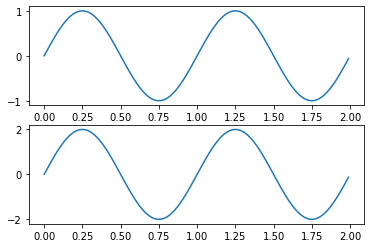

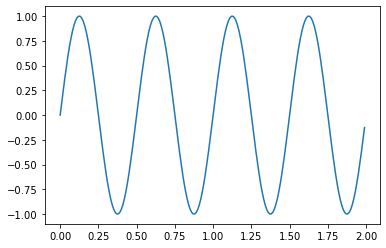

In [1]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)
plt.figure(2)
plt.plot(t, s2)
plt.show()

In [2]:
from bokeh.plotting import figure, output_file, show
# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]
# output to static HTML file
output_file("log_lines.html")
# create a new plot
p = figure(
 tools="pan,box_zoom,reset,save",
 y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
 x_axis_label='sections', y_axis_label='particles'
)
# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")
# show the results
show(p)


<ipython-input-3-671685ebea9c>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


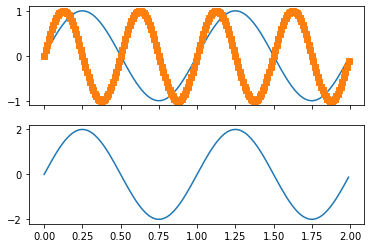

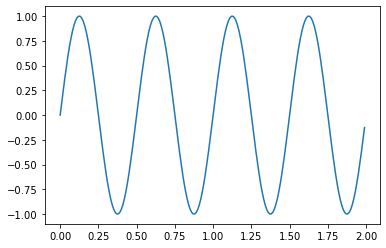

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#numpy arange is array creation routine
t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s1)
plt.subplot(212)
plt.plot(t, 2*s1)
plt.figure(2)
plt.plot(t, s2)
plt.figure(1)
plt.subplot(211)
plt.plot(t, s2, 's')
ax = plt.gca()
ax.set_xticklabels([])
plt.show()

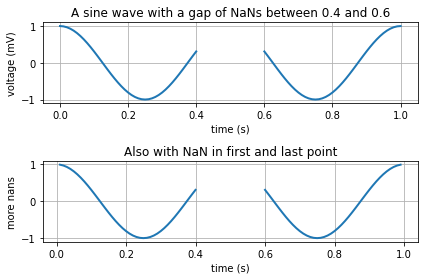

In [4]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2 * 2*np.pi * t)
t[41:60] = np.nan
plt.subplot(2, 1, 1)
plt.plot(t, s, '-', lw=2)
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
plt.grid(True)
plt.subplot(2, 1, 2)
t[0] = np.nan
t[-1] = np.nan
plt.plot(t, s, '-', lw=2)
plt.title('Also with NaN in first and last point')
plt.xlabel('time (s)')
plt.ylabel('more nans')
plt.grid(True)
plt.tight_layout()
plt.show()


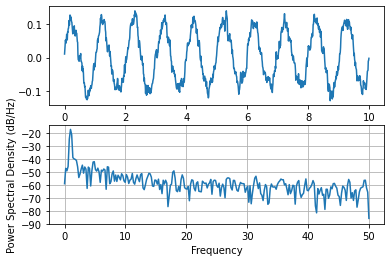

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
# Fixing random state for reproducibility
np.random.seed(19680801)
dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse
plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)
plt.show()


In [6]:
t = [0:dt:10];
nse = randn(size(t));
r = exp(-t/0.05);
cnse = conv(nse, r)*dt;
cnse = cnse(1:length(t));
s = 0.1*sin(2*pi*t) + cnse;
subplot(211)
plot(t,s)
subplot(212)
psd(s, 512, 1/dt)

SyntaxError: invalid syntax (<ipython-input-6-78e81f1d7b10>, line 1)

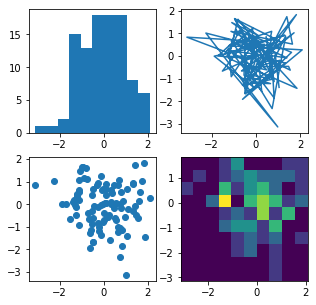

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(19680801)
data = np.random.randn(2, 100)
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])
plt.show()

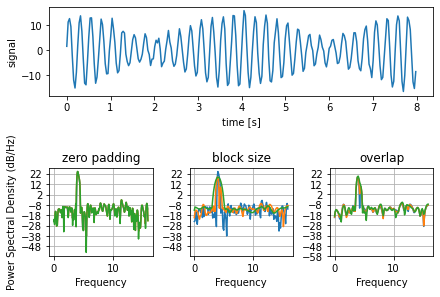

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)
# Plot the raw time series
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(t, y)
ax.set_xlabel('time [s]')
ax.set_ylabel('signal')
# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
ax2 = fig.add_subplot(gs[1, 0])
ax2.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)
plt.title('zero padding')
# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
ax3.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
ax3.set_ylabel('')
plt.title('block size')
# Plot the PSD with different amounts of overlap between blocks
ax4 = fig.add_subplot(gs[1, 2], sharex=ax2, sharey=ax2)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
 noverlap=int(0.05 * len(t) / 2.), Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
 noverlap=int(0.2 * len(t) / 2.), Fs=fs)
ax4.set_ylabel('')
plt.title('overlap')
plt.show()

In [9]:
from bokeh.plotting import figure, output_file, show
# prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]
# output to static HTML file
output_file("log_lines.html")
# create a new plot
p = figure(
 tools="pan,box_zoom,reset,save",
 y_axis_type="log", y_range=[0.001, 10**11], title="log axis example",
 x_axis_label='sections', y_axis_label='particles'
)
# add some renderers
p.line(x, x, legend_label="y=x")
p.circle(x, x, legend_label="y=x", fill_color="white", size=8)
p.line(x, y0, legend_label="y=x^2", line_width=3)
p.line(x, y1, legend_label="y=10^x", line_color="red")
p.circle(x, y1, legend_label="y=10^x", fill_color="red", line_color="red", size=6)
p.line(x, y2, legend_label="y=10^x^2", line_color="orange", line_dash="4 4")
# show the results
show(p)


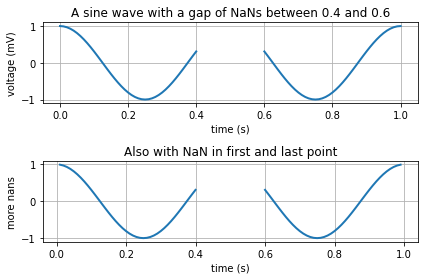

In [10]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2 * 2*np.pi * t)
t[41:60] = np.nan
plt.subplot(2, 1, 1)
plt.plot(t, s, '-', lw=2)
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
plt.grid(True)
plt.subplot(2, 1, 2)
t[0] = np.nan
t[-1] = np.nan
plt.plot(t, s, '-', lw=2)
plt.title('Also with NaN in first and last point')
plt.xlabel('time (s)')
plt.ylabel('more nans')
plt.grid(True)
plt.tight_layout()
plt.show()

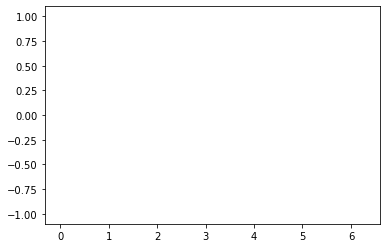

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, ax = plt.subplots()
x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))
def init():# only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,
    
def animate(i):
    line.set_ydata(np.sin(x + i / 100)) # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)
    

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
# fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
plt.show()

In [13]:
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
# prepare some data
N = 100
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)
# output to static HTML file
output_file("linked_panning.html")
# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)
# NEW: create a new plot and share both ranges
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)
# NEW: create a new plot and share only one range
s3 = figure(width=250, height=250, x_range=s1.x_range, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)
# NEW: put the subplots in a gridplot
p = gridplot([[s1, s2, s3]], toolbar_location=None)
# show the results
show(p)

In [14]:
import numpy as np
from bokeh.plotting import *
from bokeh.models import ColumnDataSource
# prepare some date
N = 300
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
# output to static HTML file
output_file("linked_brushing.html")
# NEW: create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select"
# create a new plot and add a renderer
left = figure(tools=TOOLS, width=350, height=350, title=None)
left.circle('x', 'y0', source=source)
# create another new plot and add a renderer
right = figure(tools=TOOLS, width=350, height=350, title=None)
right.circle('x', 'y1', source=source)
# put the subplots in a gridplot
p = gridplot([[left, right]])
# show the results
show(p)

In [15]:
pip install tabpy

  Using cached incremental-17.5.0-py2.py3-none-any.whl (16 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=432d7d17fb55d331d5d2bcab55c597fc2ea36999cd92a3cc09966e14706c12cb
  Stored in directory: c:\users\mrsil\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
  Created wheel for genson: filename=genson-1.2.2-py2.py3-none-any.whl size=21266 sha256=7b2dd40512df1b055f5af92dc2fe2ef15636265098323395634fda1b73acab73
  Stored in directory: c:\users\mrsil\appdata\local\pip\cache\wheels\69\0a\6d\b5c188538466dc1e8f033fd5ab97adedcf184f3e81ffbd83c9
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=14ae1b94ee0bb59ff3d10064884408a6f1ce2faa1dccc0773574b4d726bb5005
  Stored in directory: c:\users\mrsil\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
  Running setup.py clean for twisted
  Created wheel for simplejson: filename=simplejson-

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\mrsil\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\mrsil\\AppData\\Local\\Temp\\pip-install-b3et_0v3\\twisted\\setup.py'"'"'; __file__='"'"'C:\\Users\\mrsil\\AppData\\Local\\Temp\\pip-install-b3et_0v3\\twisted\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\mrsil\AppData\Local\Temp\pip-wheel-31hg3ya9'
       cwd: C:\Users\mrsil\AppData\Local\Temp\pip-install-b3et_0v3\twisted\
  Complete output (947 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\twisted
  copying src\twisted\copyright.py -> build\lib.win-amd64-3.8\twisted
  copying src\twisted\plugin.py -> build\lib.win-amd64-3.8\twisted
  copying src\twisted\_versio